# Imports and configs

In [13]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from plotly.subplots import make_subplots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

In [2]:
airline_passengers_data_path = "https://storage.googleapis.com/edulabs-public-datasets/airline-passengers.csv"
shampoo_sales_data_path = "https://storage.googleapis.com/edulabs-public-datasets/shampoo-sales.csv"

#This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.
dayly_minimum_temp_data_path = "https://storage.googleapis.com/edulabs-public-datasets/daily-minimum-temperatures.csv"

# number of daily female births in California in 1959
dayly_total_female_births_data_path = "https://storage.googleapis.com/edulabs-public-datasets/daily-total-female-births.csv"

In [3]:
pd.options.plotting.backend = "plotly"


# Load Data

In [6]:
temp_df = pd.read_csv(dayly_minimum_temp_data_path, parse_dates=["Date"])
ts = temp_df.set_index("Date").squeeze()


# Check stationarity before fitting autoregression model

In [9]:
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic: -4.444805
p-value: 0.000247
Critical Value (1%): -3.4321532327220154
Critical Value (5%): -2.862336767636517
Critical Value (10%): -2.56719413172842


# Find *p* (lag) value

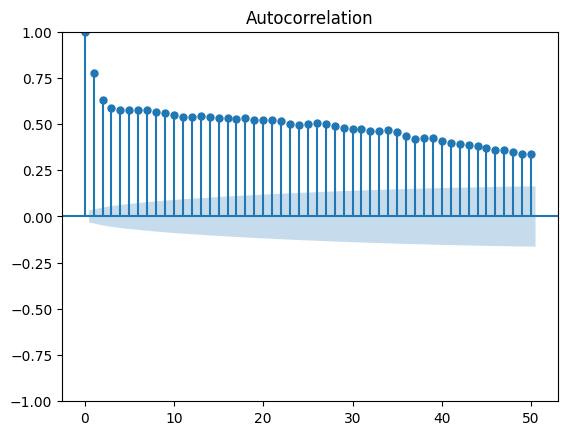

In [10]:
plot_acf(ts, lags=50) # Adjust lags as needed
plt.show()

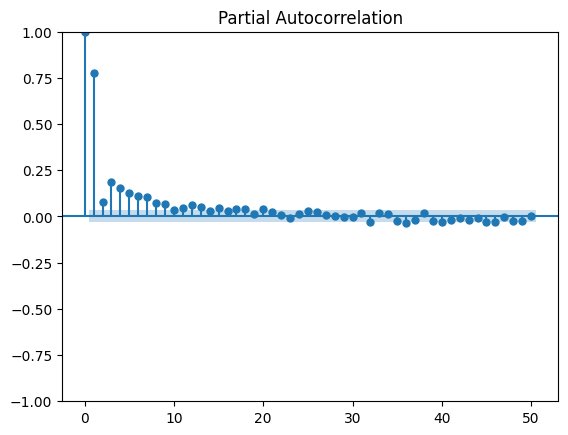

In [12]:
plot_pacf(ts, lags=50)
plt.show()

# Data split - lets use holdout strategy

In [16]:
ts.shape

(3650,)

In [17]:
train = ts[:int(0.8*(ts.shape[0]))]
test = ts[int(0.8*(ts.shape[0])):]

# Fitting autoregression model

In [ ]:
model = AutoReg(train, lags=7)
model_fit = model.fit()


# Recursive Forecasting

In [ ]:

# Forecast next 20 points
forecast = model_fit.predict(start=len(train), end=len(train)+5)
forecast

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=test[:6], mode='lines+markers', name='Actual'))
fig.add_trace(go.Scatter(y=forecast, mode='lines+markers', name='Predicted'))
fig.update_layout(title='Actual vs Predicted Values', xaxis_title='Date', yaxis_title='Value')
fig.show()


# Rolling Forecast

In [33]:
# Rolling Forecast

history = [x for x in train]
predictions = list()

for i in range(len(test[:10])):
    model = AutoReg(history, lags=7)
    model_fit = model.fit()
    yhat = model_fit.predict(start=len(history), end=len(history))
    predictions.append(yhat[0])
    history.append(test[i])

fig = go.Figure()
fig.add_trace(go.Scatter(y=test[:10], mode='lines+markers', name='Actual'))
fig.add_trace(go.Scatter(y=predictions, mode='lines+markers', name='Predicted'))
fig.update_layout(title='Rolling Forecast', xaxis_title='Date', yaxis_title='Value')
fig.show()


<ipython-input-33-97ec4237006f>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-33-97ec4237006f>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-33-97ec4237006f>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-33-97ec4237006f>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

# Validate residuals distribution and check error

In [34]:
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    model = AutoReg(history, lags=7)
    model_fit = model.fit()
    yhat = model_fit.predict(start=len(history), end=len(history))
    predictions.append(yhat[0])
    history.append(test[i])

fig = go.Figure()
fig.add_trace(go.Scatter(y=test, mode='lines+markers', name='Actual'))
fig.add_trace(go.Scatter(y=predictions, mode='lines+markers', name='Predicted'))
fig.update_layout(title='Rolling Forecast', xaxis_title='Date', yaxis_title='Value')
fig.show()

<ipython-input-34-51e041f05777>:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-34-51e041f05777>:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-34-51e041f05777>:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-34-51e041f05777>:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wi

In [36]:
residuals = test - predictions

In [38]:
residuals.plot(kind='hist')

In [39]:
from sklearn import metrics

print(metrics.mean_absolute_error(test, predictions))
print(metrics.mean_absolute_percentage_error(test, predictions))

1.762125214003254
0.2078178081670655


# Exercise 1

1. Use births dataset, and train autoregression model to predict female births for the upcoming week (7 days)
2. Perform stationarity check before fitting the model
3. Select p (lags) to feed into the model
4. Use holdout strategy for data split (split 85% / 15%)
5. Try Recursive forecasting, plot actual vs predicted, print MAE
6. Try Rolling forecasting, plot actual vs predicted, print MAE. But this time you have the following limitation - you know that in the production you don't get new births data every day, you get reports every 2 days. Write rolling forecasting taking this limitation into account

In [40]:
# number of daily female births in California in 1959
dayly_total_female_births_data_path = "https://storage.googleapis.com/edulabs-public-datasets/daily-total-female-births.csv"
births_df = pd.read_csv(dayly_total_female_births_data_path, parse_dates=["Date"])